In [1]:
library(tidyverse)
library(archive)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:

url = "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"

cleveland = read_csv(archive_read(url,"processed.cleveland.data"), col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
switzerland = read_csv(archive_read(url, "processed.switzerland.data"), col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
hungarian = read_csv(archive_read(url, "processed.hungarian.data"), col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
beach = read_csv(archive_read(url, "processed.va.data"), col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, cp, chol, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, cp, oldpeak, num

ℹ Use `spec()` to retr

In [3]:
# second method of reading data -- DO NOT RUN THIS CELL
cleveland_url <- "https://raw.githubusercontent.com/Dangel02/heartdisease_dataset/845acf4c5845b3583c8b2ec85c7c1ac36cae478d/data/processed.cleveland.csv"
hungarian_url <- "https://raw.githubusercontent.com/Dangel02/heartdisease_dataset/845acf4c5845b3583c8b2ec85c7c1ac36cae478d/data/processed.hungarian.csv"
switzerland_url <- "https://raw.githubusercontent.com/Dangel02/heartdisease_dataset/845acf4c5845b3583c8b2ec85c7c1ac36cae478d/data/processed.switzerland.csv"
beach_url <-  "https://raw.githubusercontent.com/Dangel02/heartdisease_dataset/845acf4c5845b3583c8b2ec85c7c1ac36cae478d/data/processed.va.csv"

names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thanl", "num")

cleveland <- read_csv(cleveland_url, col_names = names)
hungarian <- read_csv(hungarian_url, col_names = names)
switzerland <- read_csv(switzerland_url, col_names = names)
beach <- read_csv(beach_url, col_names = names)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thanl
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thanl
dbl (5): age, sex, cp, oldpeak, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, fbs, restecg, thalach, exang, oldpeak, slope, ca, thanl
dbl (5): age, sex, cp, chol, num

ℹ Use `spec()` to r

In [4]:
# changed to double just so i can bind the 4 dfs together
cleveland <- mutate_all(cleveland, as.double)
hungarian <- mutate_all(hungarian, as.double)
switzerland <- mutate_all(switzerland, as.double)
beach <- mutate_all(beach, as.double)

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `ca = .Primitive("as.double")(ca)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `trestbps = .Primitive("as.double")(trestbps)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.”
Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `trestbps = .Primitive("as.double")(trestbps)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.”
Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `trestbps = .Primitive("as.double")(trestbps)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see 

In [5]:
heart_data <- bind_rows(cleveland, hungarian, switzerland, beach) |>
                mutate(num = ifelse(num %in% 1:4, 1, num)) |>
                mutate(num = as_factor(num))
# heart_data

In [6]:
age_data <- heart_data |>
    group_by(age) |>
    summarize(count = n())

chol_data <- heart_data |>
    group_by(chol) |>
    summarize(count = n())

trestbps_data <- heart_data |>
    group_by(trestbps) |>
    summarize(count = n())

thalach_data <- heart_data |>
    group_by(thalach) |>
    summarize(count = n())

oldpeak_data <- heart_data |>
    group_by(oldpeak) |>
    summarize(count = n())

In [7]:
options(repr.plot.width = 5, repr.plot.height = 5) 
plot_age <- ggplot(age_data, aes(x = age, y = count)) +
    geom_point()+
    labs(x = "Age", "Count of people with heart disease")+
    theme(text = element_text(size = 20))

plot_chol <- ggplot(chol_data, aes(x = chol, y = count)) +
    geom_point()+
    labs(x = "Serum Cholestoral(mg/dl)", "Count of people with heart disease")+
    theme(text = element_text(size = 20))

plot_trestbps <- ggplot(trestbps_data, aes(x = trestbps, y = count)) +
    geom_point()+
    labs(x = "Resting Blood Pressure(mmHg)", "Count of people with heart disease")+
    theme(text = element_text(size = 20))

plot_thalach <- ggplot(thalach_data, aes(x = thalach, y = count)) +
    geom_point()+
    labs(x = "Maximum Heart Rate", "Count of people with heart disease")+
    theme(text = element_text(size = 20))

plot_oldpeak <- ggplot(oldpeak_data, aes(x = oldpeak, y = count)) +
    geom_point()+
    labs(x = "ST Depression Induced", "Count of people with heart disease")+
    theme(text = element_text(size = 20))
# age, chol, trestbps, thalach, oldpeak

We used age, chol, trestbps, thalach, oldpeak as the predictors for the below reasons:  
1. They are quntitive variables which means it will be better to be used for scaling and centering. Categorical variables like sex is hard to be given a specific number to
   scale.
2. They are all related to the cause of heart disease. And we can recognize it through the below bar charts.

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


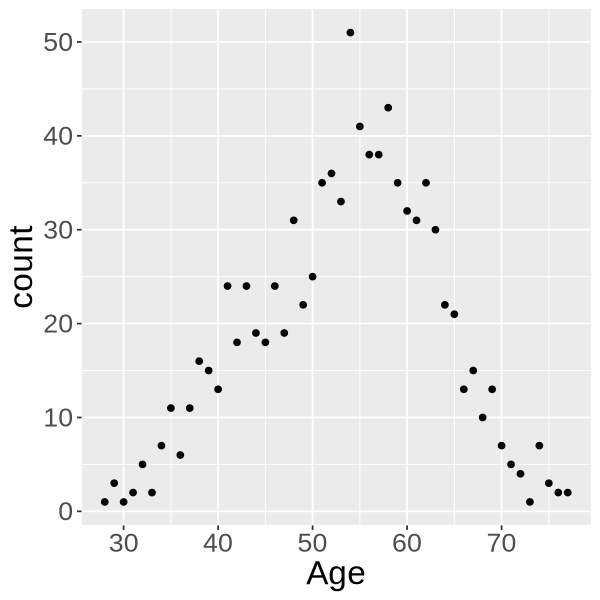

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


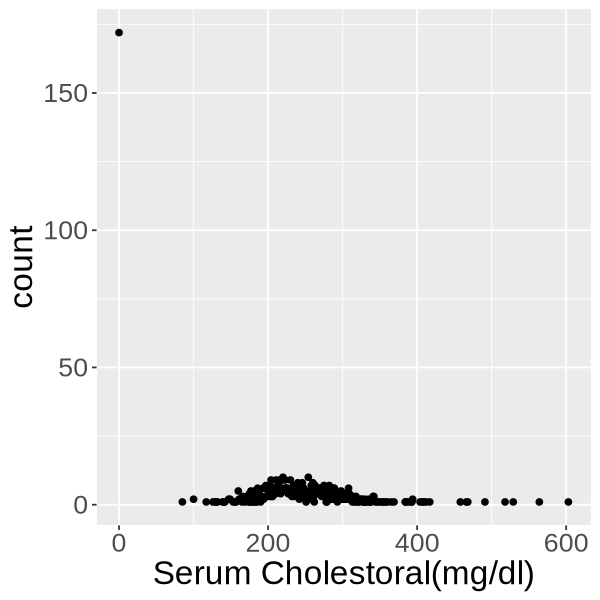

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


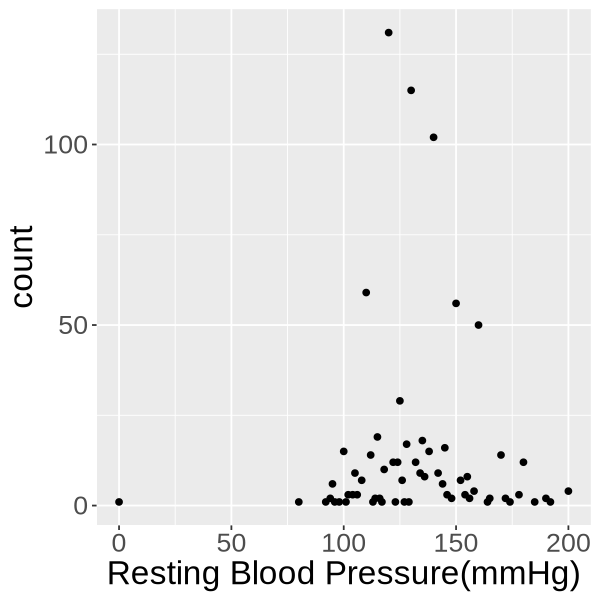

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


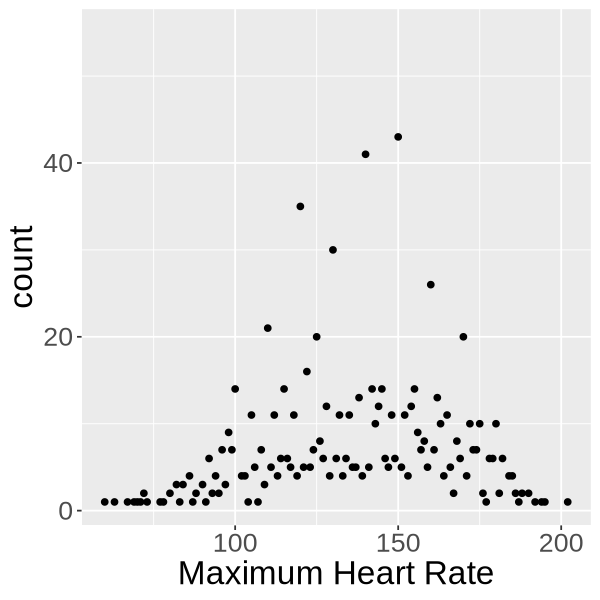

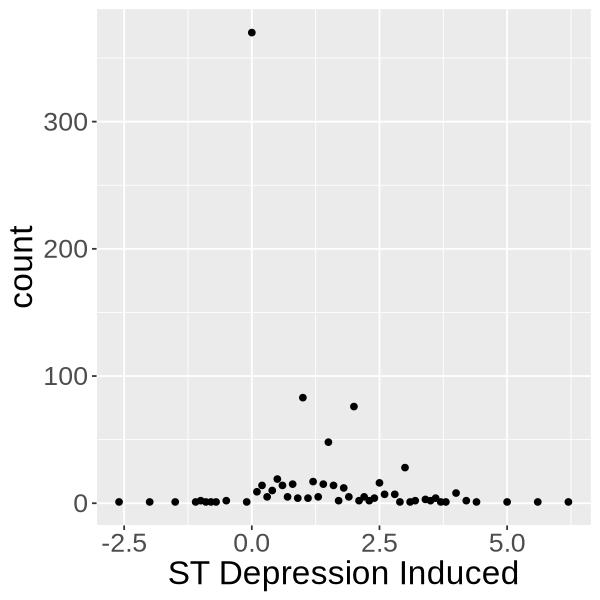

In [8]:
plot_age
plot_chol
plot_trestbps
plot_thalach
plot_oldpeak